# Scraper Promiedos : Estadisticas Historicas Equipo por Equipo

Este scraper obtiene los datos de tabla historicos Equipo por Equipo de la pagina web www.promiedos.com.ar , y crea un DataFrame limpio para su analisis 

### Carga de las Librerias
* requests : para hacer las peticiones a la web
* BeautifulSoup : para escrapear la web
* Pandas : para mostrar los datos en un dataframe y poder analizarlo.
* Time : para detener unos segundos nuestro programa mientras descarga los datos de la web


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

Asignamos a la variable URL ,la pagina web que queremos escrapear

In [2]:
url='https://www.promiedos.com.ar/historiales='

In [ ]:
Creamos un diccionario para guardar las estadisticas por equipo

In [186]:
estadisticas={}

* Hacemos una iteracion por cada pagina (Corresponde a una pagina por equipo)

* Hacemos una segunda iteracion ,primero para recorrer todos los datos de la web ,y luego para recorrer todos los datos para cada equipo en particular.

* Cada stats que obtenemos del equipo la vamos guardando en una lista, incluido el nombre del mismo.El primer elemento de la lista debemos omitirlo ya que corresponde a un numero de equipo que no es de utilidad.

* Guardamos los datos de la lista "equipo" en el diccionario "estadisticas".

In [187]:
contador=1 # Creamos un contador para ir sumando las iteraciones 
for pag in range(1,111): # la iteracion la hacemos hasta el valor 111 ya que es la ultima pagina con datos 
    page_response= requests.get(url+str(pag), timeout=5)  # Obtenemos los datos de la URL  
    time.sleep(5)  # Otorgamos 5 segundos de espera para que responda la pagina 
    page_content=BeautifulSoup(page_response.content ,"html.parser") # Parseamos la URL  
    datos_equipos=page_content.find_all(attrs={'class':'tablesorter3'} ) # Buscamos dentro de la web, los datos de las tablas de las estadisticas del equipo
    
    if datos_equipos ==[]: #En caso que obtengamos una lista vacia de la peticion anterior , pasamos a la proxima iteracion.
        continue    
        

    nombres_equipos_web=page_content.find_all(attrs={'class':'titulotabla'}) # Obtengo los datos web con los nombres de los equipos para poder recorrerlos.
    nombres_equipos_web_parseado=[] 
    for nombre_equipo in nombres_equipos_web: # Itero dentro de los datos web con los nombres ,para obtener el nombre limpio        
        for nombres in nombre_equipo:            
            nombres_equipos_web_parseado.append(nombres)
    nombre=nombres_equipos_web_parseado[2] # El nombre corresponde a la posicion 2 del parseo
    
    print(nombre)

    Resultados = []
    for th in datos_equipos:        # Guardamos en la variable Resultados  los datos obtenidos en cada web de cada equipo
            Resultados.extend(th.find_all('td'))

    lista=[]
    for result in  Resultados:   # Recorremos la variable Resultados que tiene los datos y los convertimos a texto para poder tratarlos       
          lista.append(result.text)

    if contador==1:
        pass
    else:    
        contador+=1

    for dato in range(0 ,len(lista),7):   #Recorro cada lista que esta compuesta por 7 datos. Me interesan los primeros 6.     
        estats_por_equipo=[]
        estats_por_equipo.append(lista[dato:dato+6])
        time.sleep(0.2)        
        
        rival=estats_por_equipo[0][0] # Obtengo el nombre del riva, y elimino sus 3 primeras letras ( " vs") 
        rival=rival[3:]

        estats_por_equipo=estats_por_equipo[0]
        estats_por_equipo[0]=rival # Reemplazo el primer valor de la lista ,por el rival
        
        
        lista_estats_por_equipo=[]
        lista_estats_por_equipo.append(nombre)
        for datos in estats_por_equipo: # Itero para ir agregando al diccionario los datos totales por cada equipo
            lista_estats_por_equipo.append(datos)
        estadisticas[str(contador)]= lista_estats_por_equipo
        contador+=1
     

ALL BOYS
ARGENTINOS
ARSENAL
BANFIELD
BOCA JUNIORS
COLON
ESTUDIANTES (LP)
GIMNASIA (LP)
GODOY CRUZ
HURACAN
INDEPENDIENTE
LANUS
NEWELLS
OLIMPO
QUILMES
RACING CLUB
RIVER PLATE
SAN LORENZO
TIGRE
VELEZ
ALDOSIVI
ATL RAFAELA
ATL TUCUMAN
BELGRANO
CHACARITA
DEF Y JUSTICIA
FERRO
GIMNASIA (J)
IND RIVADAVIA
INSTITUTO
PATRONATO
ROSARIO CENTRAL
SAN MARTIN (SJ)
SAN MARTIN (T)
TIRO FEDERAL (R)
UNION
LOS ANDES
ATLANTA
NUEVA CHICAGO
DEF. DE BELGRANO
DEP. MORON
PLATENSE
CENTRAL NORTE (S)
CHACO FOR EVER
CIPOLLETTI
DESAMPARADOS
TALLERES (C)
GIMNASIA (S)
JUV. ANTONIANA
GIMNASIA (CDU)
DEP. ESPAñOL
TALLERES (RDE)
CENTRAL CBA (R)
ESTUDIANTES (BA)
SP. ITALIANO
ALMAGRO
SANTAMARINA
TEMPERLEY
CENTRAL CBA (SDE)
RACING (C)
CRUCERO (M)
SARMIENTO (J)
ALVARADO
DEP. ARMENIO
GUARANI (M)
SAN TELMO
JUV. UNIDA (SL)


* Creamos un dataframe llamado "stats_equipos" con el diccionario "estadisticas" (debemos transponerlo ya que necesitamos intercambiar las filas por columnas)

* Asignamos los nombres a cada columna del dataframe

* Iteramos en las columnas que quisieramos convertir a numeros enteros (esto se debe a que cuando scrapeamos al principio ,los datos obtenidos de la web son todos strings)

* Asignamos la columna "EQUIPO" como indice.

In [199]:
stats_equipos=pd.DataFrame(estadisticas).transpose()
stats_equipos.columns=['EQUIPO','RIVAL','DIF','PJ','PG','PE','PP']
for columna in stats_equipos.columns[2:]:    
    stats_equipos[str(columna)] = stats_equipos[str(columna)].astype(int)
stats_equipos.set_index('EQUIPO',inplace=True)

### Dataframe final

In [200]:
stats_equipos

,RIVAL,DIF,PJ,PG,PE,PP
EQUIPO,,,,,,
ALL BOYS,Argentinos,-16,38,4,14,20
ALL BOYS,Estudiantes (LP),-10,30,7,6,17
ALL BOYS,Huracan,-12,26,4,6,16
ALL BOYS,Racing Club,-8,26,6,6,14
ALL BOYS,Velez,-1,26,7,11,8
...,...,...,...,...,...,...
JUV. UNIDA (SL),Ferro,0,2,1,0,1
JUV. UNIDA (SL),Independiente,-2,2,0,0,2
JUV. UNIDA (SL),Union,-2,2,0,0,2


## Graficamos los puntos historicos obtenidos

Cargamos la libreria de graficos y definimos el tamaño de los gráficos para que se ajusten bien al notebook

In [458]:
%matplotlib inline   
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 18, 8
plt.style.use('ggplot')

* Elegimos un equipo para ver sus diferencias en el historial

* Ordenamos los datos por Diferencia 

* Selecciomamos solo los equipos que se enfrentaron mas de 120 veces

* Graficamos en forma de barra los historiales del equipo elegido

In [470]:
mayor_dif_equipo=stats_equipos.sort_values(by='DIF',ascending=False)
mayor_dif_equipo.DIF.values
mayor_dif_equipo=mayor_dif_equipo.loc['RIVER PLATE']
mayor_dif_equipo=mayor_dif_equipo[mayor_dif_equipo['PJ']>120]

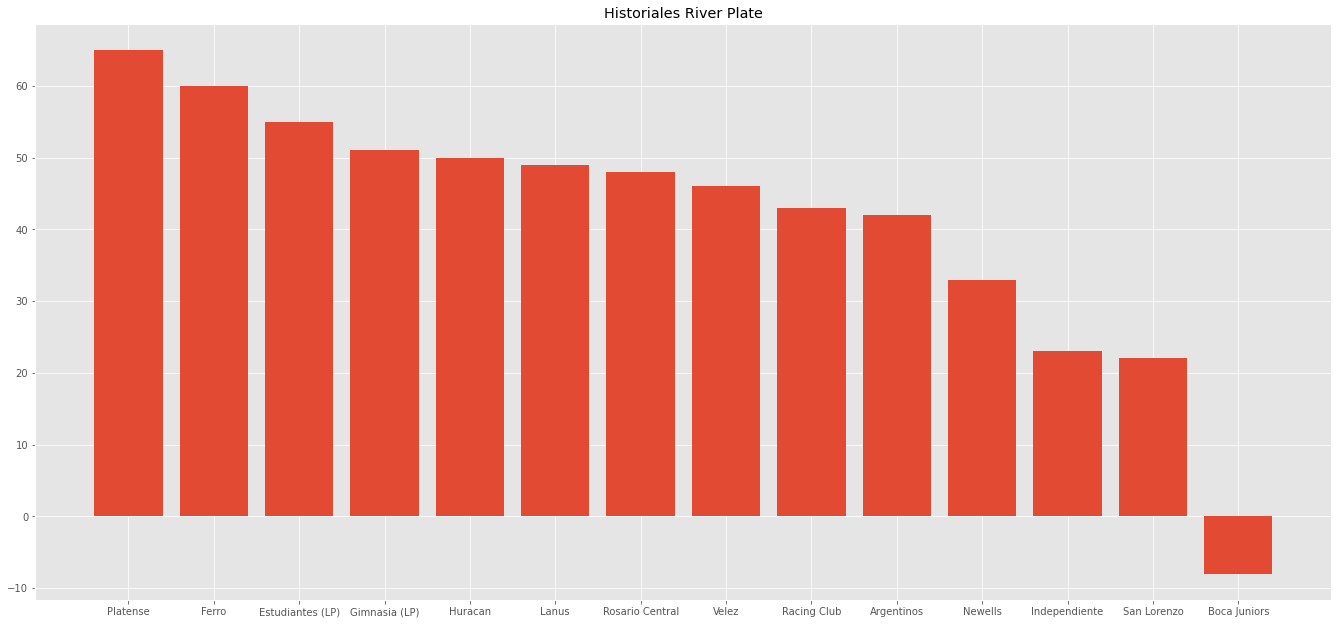

In [471]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mayor_dif_equipo.RIVAL,mayor_dif_equipo.DIF)
ax.set_title("Historiales River Plate")
plt.show()

### Mayores diferencias en el historial por equipo

* Ordenamos los datos por Diferencia

* Seleccionamos las mejores diferencias de partidos por equipo , y de esto ,sacamos una muestra de los 10 primeros


In [472]:
mayores_dif_totales=stats_equipos.sort_values(by='DIF',ascending=False)
mayores_dif_totales.reset_index(inplace=True)
mayores_dif_totales=mayores_dif_totales.loc[mayores_dif_totales.EQUIPO.drop_duplicates(keep='first').index].iloc[:10].set_index('EQUIPO',drop=True)

El dataframe con los datos seleccionados quedaria:

In [473]:
mayores_dif_totales

,RIVAL,DIF,PJ,PG,PE,PP
EQUIPO,,,,,,
RIVER PLATE,Platense,65,138,87,29,22
BOCA JUNIORS,Estudiantes (LP),65,200,109,47,44
INDEPENDIENTE,Ferro,49,157,84,38,35
SAN LORENZO,Ferro,45,151,76,44,31
RACING CLUB,Ferro,43,143,70,46,27
HURACAN,Ferro,35,121,62,32,27
VELEZ,Platense,29,120,58,33,29
ESTUDIANTES (LP),Platense,22,116,55,28,33
NEWELLS,Chacarita,21,87,42,24,21
